In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.multiclass import OneVsRestClassifier

In [2]:
data = pd.read_json('train.json', encoding='utf-8')
data.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [3]:
test_data = pd.read_json('test.json', encoding='utf-8')
test_data.head()





,id,ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,..."
4,35687,"[ground black pepper, salt, sausage casings, l..."


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
cuisine        39774 non-null object
id             39774 non-null int64
ingredients    39774 non-null object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


In [6]:
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9944 entries, 0 to 9943
Data columns (total 2 columns):
id             9944 non-null int64
ingredients    9944 non-null object
dtypes: int64(1), object(1)
memory usage: 155.5+ KB


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

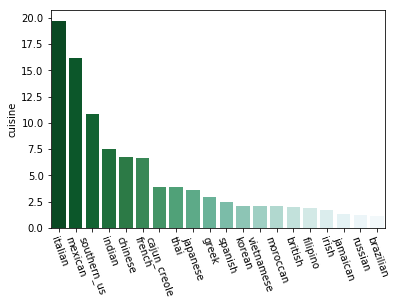

In [7]:
# Bar Plot of various cuisines appearance frequency 
y = data['cuisine'].value_counts()
x = y/y.sum() * 100
y = y.index
sns.barplot(y, x, data=data, palette="BuGn_r")
plt.xticks(rotation=-70)

In [8]:
# The most popular ingredients
ingre_df = pd.DataFrame(
    Counter(
        [i for sublist in data.ingredients for i in sublist]).most_common(),
    columns=['ingredients', 'total']
    )
ingre_df.head(10)

,ingredients,total
0,salt,18049
1,onions,7972
2,olive oil,7972
3,water,7457
4,garlic,7380
5,sugar,6434
6,garlic cloves,6237
7,butter,4848
8,ground black pepper,4785
9,all-purpose flour,4632


In [9]:
print('max number of ingredients in Cuisine', (data['ingredients'].str.len()).max())
print('min number of ingredients in Cuisine', (data['ingredients'].str.len()).min())

max number of ingredients in Cuisine 65
min number of ingredients in Cuisine 1


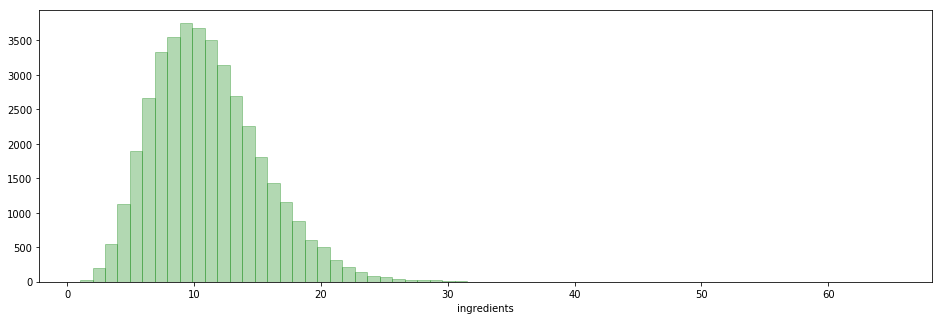

In [10]:
sns.distplot(data['ingredients'].str.len(), bins=max(data['ingredients'].str.len()),
             hist=True,
             hist_kws={"linewidth": 1, "alpha": 0.3, "edgecolor":'g', "color": "g"}, # "histtype": "step", "color": "g"
             kde=False)
plt.gcf().set_size_inches(16,5)
plt.show()

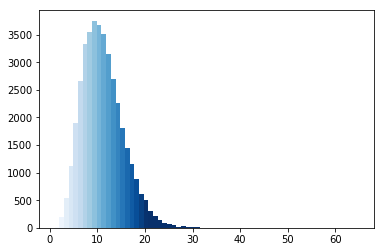

In [11]:
plot_data = data['ingredients'].str.len(),

# This is  the colormap I'd like to use.
cm = plt.cm.get_cmap('Blues')

# Plot histogram.
n, bins, patches = plt.hist(
    plot_data, 
    bins=max(data['ingredients'].str.len())) 

# scale values to interval [0,1]
bin_centers = 0.5 * (bins[:-1] + bins[1:])
col = bin_centers - min(bin_centers) ; col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c/0.3))
plt.show()

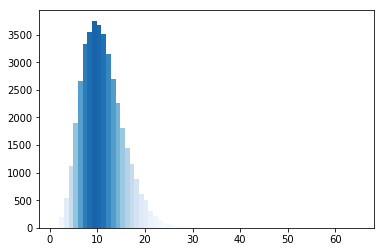

In [12]:
plot_data = data['ingredients'].str.len(),

# This is  the colormap I'd like to use.
cm = plt.cm.get_cmap('Blues')

# Plot histogram.
n, bins, patches = plt.hist(
    plot_data, 
    bins=max(data['ingredients'].str.len())) 

# To normalize your values
col = 0.8*(n-n.min())/(n.max()-n.min())


for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', cm(c))
plt.show()

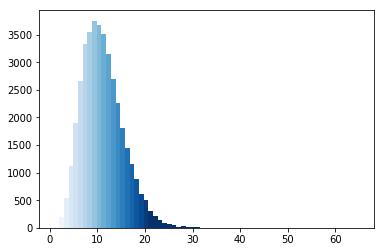

In [13]:
plot_data = data['ingredients'].str.len(),

# This is  the colormap I'd like to use.
cm = plt.cm.get_cmap('Blues')

# Plot histogram.
n, bins, patches = plt.hist(
    plot_data, 
    bins=max(data['ingredients'].str.len())) 

for i, p in enumerate(patches):
    plt.setp(p, 'facecolor', cm(i/20))

plt.show()

In [14]:
pd.set_option('display.max.colwidth', 150)
data[data['cuisine'] == 'korean']

,cuisine,id,ingredients
66,korean,8530,"[jasmine rice, garlic, scallions, sugar, shiitake, Gochujang base, beansprouts, top round steak, sesame seeds, rice vinegar, carrots, soy sauce, s..."
88,korean,17004,"[water, barley]"
104,korean,7782,"[cooking spray, garlic cloves, sliced green onions, chile paste, salt, fresh lime juice, sugar, flank steak, corn tortillas, lower sodium soy sauc..."
109,korean,47095,"[sugar, water, noodles, pork, corn starch, baby bok choy, black bean sauce, red potato, kosher salt, onions]"
140,korean,27165,"[fish sauce, chicken broth, sesame oil, green onions, eggs]"
157,korean,34248,"[soy sauce, chili paste, oil, brown sugar, honey, red pepper flakes, kiwi, pepper, asian pear, garlic cloves, pork, fresh ginger, salt]"
162,korean,2472,"[wakame, extra-lean ground beef, minced garlic, salt, water, soy sauce, sesame oil]"
182,korean,14970,"[soy sauce, ginger, canola oil, flour, rice vinegar, honey, garlic, chicken wings, sesame oil, corn starch]"
215,korean,428,"[sesame oil, water, soy sauce, kale]"
241,korean,242,"[romaine lettuce, sesame seeds, gingerroot, soy sauce, sesame oil, cooked white rice, sugar, mirin, garlic cloves, rib eye steaks, black pepper, h..."


In [15]:
print('cuisine 총 개수 {} \n cuisine 종류 {}'.format(len(data['cuisine'].unique()), list(data['cuisine'].unique())))

cuisine 총 개수 20 
 cuisine 종류 ['greek', 'southern_us', 'filipino', 'indian', 'jamaican', 'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai', 'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese', 'irish', 'korean', 'moroccan', 'russian']


In [16]:
# Label Encoding of y - the target kinds of cuisine
y_train = data['cuisine']
lb = LabelEncoder()
y_train = lb.fit_transform(y_train)
y_train

array([ 6, 16,  4, ...,  8,  3, 13])

In [17]:
print('레이블 인코딩 Inverse Transform 결과 {}'.format(
    list(lb.inverse_transform(range(20)))))

레이블 인코딩 Inverse Transform 결과 ['brazilian', 'british', 'cajun_creole', 'chinese', 'filipino', 'french', 'greek', 'indian', 'irish', 'italian', 'jamaican', 'japanese', 'korean', 'mexican', 'moroccan', 'russian', 'southern_us', 'spanish', 'thai', 'vietnamese']


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y_train, random_state = 0)
print('학습데이터 {}, 실험데이터 {}'.format(X_train.shape, X_test.shape))

학습데이터 (29830, 3), 실험데이터 (9944, 3)


In [19]:
train_doc = [" ".join(str(x) for x in X_train.ingredients)]
test_doc = [" ".join(str(x) for x in X_test.ingredients)]

In [21]:
X_train['seperated_ingredients'] = X_train['ingredients'].apply(','.join)
X_test['seperated_ingredients'] = X_test['ingredients'].apply(','.join)

c:\users\daumsoft\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\daumsoft\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
X_train.shape

(29830, 4)

In [23]:
X_test.shape

(9944, 4)

In [24]:
X_train.head()

,cuisine,id,ingredients,seperated_ingredients
5110,italian,42704,"[ground black pepper, pizza doughs, olive oil, garlic, pesto, grated parmesan cheese, goat cheese, eggplant, salt]","ground black pepper,pizza doughs,olive oil,garlic,pesto,grated parmesan cheese,goat cheese,eggplant,salt"
26915,mexican,19402,"[olive oil, onions, lime juice, salt, chopped cilantro fresh, black pepper, zucchini, boneless skinless chicken breast halves, cherry tomatoes, re...","olive oil,onions,lime juice,salt,chopped cilantro fresh,black pepper,zucchini,boneless skinless chicken breast halves,cherry tomatoes,red bell pep..."
16284,mexican,34685,"[white onion, whole milk, taco seasoning, ground beef, green chile, chili, salt, enchilada sauce, eggs, shredded cheddar cheese, baking powder, ga...","white onion,whole milk,taco seasoning,ground beef,green chile,chili,salt,enchilada sauce,eggs,shredded cheddar cheese,baking powder,garlic cloves,..."
9538,french,151,"[vanilla beans, red wine, sugar, large egg yolks, armagnac, fennel seeds, milk, salt, prunes, large egg whites, all-purpose flour]","vanilla beans,red wine,sugar,large egg yolks,armagnac,fennel seeds,milk,salt,prunes,large egg whites,all-purpose flour"
4243,italian,46090,"[pepper, butter, grated parmesan cheese, salt, minced garlic, 2% reduced-fat milk, orzo pasta, fresh parsley]","pepper,butter,grated parmesan cheese,salt,minced garlic,2% reduced-fat milk,orzo pasta,fresh parsley"


In [25]:
X_test.head()

,cuisine,id,ingredients,seperated_ingredients
8834,mexican,43884,"[green chile, pepper, boneless chicken breast, chili powder, reduced-fat sour cream, red bell pepper, ground cumin, white onion, garlic powder, ja...","green chile,pepper,boneless chicken breast,chili powder,reduced-fat sour cream,red bell pepper,ground cumin,white onion,garlic powder,jalapeno chi..."
34143,mexican,29620,"[parsley sprigs, radishes, sea salt, pozole, chicken stock, white onion, tomatillos, garlic cloves, canola oil, boneless pork shoulder, pork, shre...","parsley sprigs,radishes,sea salt,pozole,chicken stock,white onion,tomatillos,garlic cloves,canola oil,boneless pork shoulder,pork,shredded cabbage..."
15808,indian,6166,"[honey, garlic cloves, strong white bread flour, vegetable oil, yoghurt, yeast, water, salt]","honey,garlic cloves,strong white bread flour,vegetable oil,yoghurt,yeast,water,salt"
3281,southern_us,36318,"[sweet potatoes, pumpkin pie spice, eggs, whipped topping, pie crust mix, McCormick® Pure Vanilla Extract, chopped pecans, cold water, salt, sweet...","sweet potatoes,pumpkin pie spice,eggs,whipped topping,pie crust mix,McCormick® Pure Vanilla Extract,chopped pecans,cold water,salt,sweetened conde..."
10823,japanese,16105,"[sake, mirin, sesame oil, fresh ginger, spring onions, rice, soy sauce, parsley leaves, vegetable oil, light brown sugar, ground black pepper, chi...","sake,mirin,sesame oil,fresh ginger,spring onions,rice,soy sauce,parsley leaves,vegetable oil,light brown sugar,ground black pepper,chicken thigh f..."


In [27]:
pd.DataFrame((X_train['ingredients'])).head()

,ingredients
5110,"[ground black pepper, pizza doughs, olive oil, garlic, pesto, grated parmesan cheese, goat cheese, eggplant, salt]"
26915,"[olive oil, onions, lime juice, salt, chopped cilantro fresh, black pepper, zucchini, boneless skinless chicken breast halves, cherry tomatoes, re..."
16284,"[white onion, whole milk, taco seasoning, ground beef, green chile, chili, salt, enchilada sauce, eggs, shredded cheddar cheese, baking powder, ga..."
9538,"[vanilla beans, red wine, sugar, large egg yolks, armagnac, fennel seeds, milk, salt, prunes, large egg whites, all-purpose flour]"
4243,"[pepper, butter, grated parmesan cheese, salt, minced garlic, 2% reduced-fat milk, orzo pasta, fresh parsley]"


In [28]:
' '.join(word for word in X_train.ingredients.iloc[0])

'ground black pepper pizza doughs olive oil garlic pesto grated parmesan cheese goat cheese eggplant salt'

In [29]:
import nltk

In [31]:
X_test[:3]

,cuisine,id,ingredients,seperated_ingredients
8834,mexican,43884,"[green chile, pepper, boneless chicken breast, chili powder, reduced-fat sour cream, red bell pepper, ground cumin, white onion, garlic powder, ja...","green chile,pepper,boneless chicken breast,chili powder,reduced-fat sour cream,red bell pepper,ground cumin,white onion,garlic powder,jalapeno chi..."
34143,mexican,29620,"[parsley sprigs, radishes, sea salt, pozole, chicken stock, white onion, tomatillos, garlic cloves, canola oil, boneless pork shoulder, pork, shre...","parsley sprigs,radishes,sea salt,pozole,chicken stock,white onion,tomatillos,garlic cloves,canola oil,boneless pork shoulder,pork,shredded cabbage..."
15808,indian,6166,"[honey, garlic cloves, strong white bread flour, vegetable oil, yoghurt, yeast, water, salt]","honey,garlic cloves,strong white bread flour,vegetable oil,yoghurt,yeast,water,salt"


In [32]:
print(X_test.ingredients.iloc[0])

['green chile', 'pepper', 'boneless chicken breast', 'chili powder', 'reduced-fat sour cream', 'red bell pepper', 'ground cumin', 'white onion', 'garlic powder', 'jalapeno chilies', 'tomatillos', 'salt', 'dried oregano', 'chicken broth', 'white cannellini beans', 'Mexican cheese blend', 'flour', 'diced tomatoes', 'enchilada sauce', 'chorizo sausage', 'white corn', 'fresh cilantro', 'flour tortillas', 'parsley', 'garlic', 'oregano']


In [33]:
total_list = [' '.join(word) for word in X_test.ingredients]
total_list[0]

'green chile pepper boneless chicken breast chili powder reduced-fat sour cream red bell pepper ground cumin white onion garlic powder jalapeno chilies tomatillos salt dried oregano chicken broth white cannellini beans Mexican cheese blend flour diced tomatoes enchilada sauce chorizo sausage white corn fresh cilantro flour tortillas parsley garlic oregano'

In [34]:
from nltk.tokenize import word_tokenize
print(word_tokenize(total_list[0]))

['green', 'chile', 'pepper', 'boneless', 'chicken', 'breast', 'chili', 'powder', 'reduced-fat', 'sour', 'cream', 'red', 'bell', 'pepper', 'ground', 'cumin', 'white', 'onion', 'garlic', 'powder', 'jalapeno', 'chilies', 'tomatillos', 'salt', 'dried', 'oregano', 'chicken', 'broth', 'white', 'cannellini', 'beans', 'Mexican', 'cheese', 'blend', 'flour', 'diced', 'tomatoes', 'enchilada', 'sauce', 'chorizo', 'sausage', 'white', 'corn', 'fresh', 'cilantro', 'flour', 'tortillas', 'parsley', 'garlic', 'oregano']


In [35]:
total_words = ' '.join(each_sent for each_sent in total_list)
total_words[:500]

'green chile pepper boneless chicken breast chili powder reduced-fat sour cream red bell pepper ground cumin white onion garlic powder jalapeno chilies tomatillos salt dried oregano chicken broth white cannellini beans Mexican cheese blend flour diced tomatoes enchilada sauce chorizo sausage white corn fresh cilantro flour tortillas parsley garlic oregano parsley sprigs radishes sea salt pozole chicken stock white onion tomatillos garlic cloves canola oil boneless pork shoulder pork shredded cabb'

In [36]:
print(word_tokenize(total_words[:100]))

['green', 'chile', 'pepper', 'boneless', 'chicken', 'breast', 'chili', 'powder', 'reduced-fat', 'sour', 'cream', 'red', 'bell', 'pepper', 'groun']


In [41]:
from nltk import Text
text = Text(word_tokenize(total_words))

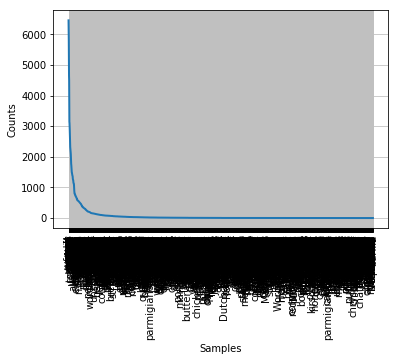

In [42]:
text.plot()

In [43]:
len(text)

203733

In [44]:
len(set(text))

2542

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer().fit(text) 
# stop_words="english"

In [50]:
count_vec.get_feature_names()[:10]

['10', '14', '25', '33', '40', '95', 'abalone', 'abbamele', 'acai', 'accent']

In [52]:
BOW_X_train = count_vec.transform(X_train['seperated_ingredients'])
BOW_X_train.shape

(29830, 2234)

In [55]:
(count_vec.transform(X_train['seperated_ingredients'][:1]))

<1x2234 sparse matrix of type '<class 'numpy.int64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [56]:
X_train['seperated_ingredients'][:1]

5110    ground black pepper,pizza doughs,olive oil,garlic,pesto,grated parmesan cheese,goat cheese,eggplant,salt
Name: seperated_ingredients, dtype: object

In [57]:
count_vec.inverse_transform((count_vec.transform(X_train['seperated_ingredients'][:1])).toarray())

[array(['black', 'cheese', 'doughs', 'eggplant', 'garlic', 'goat',
        'grated', 'ground', 'oil', 'olive', 'parmesan', 'pepper', 'pesto',
        'pizza', 'salt'], dtype='<U15')]

In [58]:
count_vec.inverse_transform((BOW_X_train.toarray()[0]))[0].astype('object')

array(['black', 'cheese', 'doughs', 'eggplant', 'garlic', 'goat',
       'grated', 'ground', 'oil', 'olive', 'parmesan', 'pepper', 'pesto',
       'pizza', 'salt'], dtype=object)

In [59]:
np.nonzero(BOW_X_train.toarray()[2])[0]

array([  33,  104,  138,  226,  245,  372,  374,  392,  396,  448,  495,
        503,  660,  666,  743,  803,  880,  888, 1238, 1351, 1356, 1360,
       1547, 1585, 1720, 1738, 1764, 1818, 1960, 1989, 2184, 2187],
      dtype=int64)

In [61]:
count_vec.inverse_transform((count_vec.transform(X_train['seperated_ingredients'][:1])).toarray())

[array(['black', 'cheese', 'doughs', 'eggplant', 'garlic', 'goat',
        'grated', 'ground', 'oil', 'olive', 'parmesan', 'pepper', 'pesto',
        'pizza', 'salt'], dtype='<U15')]

In [ ]:
count_vec.inverse_transform((X_train_vectorized.toarray()[0]))[0].astype('object')

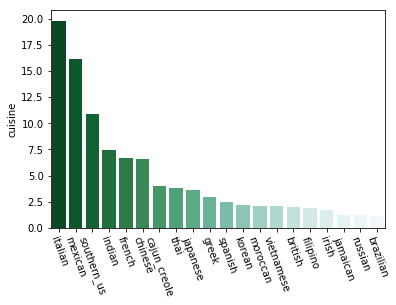

In [63]:
# Bar Plot of various cuisines appearance frequency 
y = X_train['cuisine'].value_counts()
x = y/y.sum() * 100
y = y.index
sns.barplot(y, x, data=data, palette="BuGn_r")
plt.xticks(rotation=-70)
plt.show()

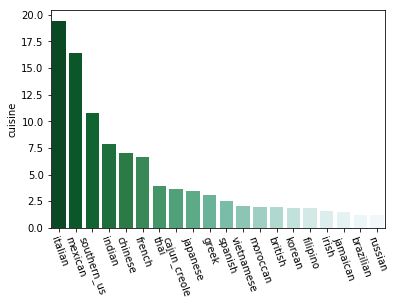

In [64]:
# Bar Plot of various cuisines appearance frequency 
y = X_test['cuisine'].value_counts()
x = y/y.sum() * 100
y = y.index
sns.barplot(y, x, data=data, palette="BuGn_r")
plt.xticks(rotation=-70)
plt.show()

In [65]:
vect = TfidfVectorizer(binary=True).fit(X_train['seperated_ingredients'].values)
X_train_vectorized = vect.transform(X_train['seperated_ingredients'].values)
X_train_vectorized = X_train_vectorized.astype('float')
X_test_transformed = vect.transform(X_test['seperated_ingredients'].values)
X_test_transformed = X_test_transformed.astype('float')

In [66]:
len(X_train_vectorized.toarray()[0])

2856

In [67]:
len(X_test_transformed.toarray()[0])

2856

In [68]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer().fit(X_train['seperated_ingredients']) # stop_words="english"
BOW_X_train = vec.transform(X_train['seperated_ingredients'])
BOW_X_train.shape

(29830, 2856)

In [69]:
vec

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [75]:
vec.get_feature_names()[-5:]

['zesty', 'zinfandel', 'ziti', 'zucchini', 'épices']

In [76]:
vect.get_feature_names()[-5:]

['zesty', 'zinfandel', 'ziti', 'zucchini', 'épices']

In [77]:
len(vec.get_feature_names())

2856

In [78]:
len(BOW_X_train.toarray()[0])

2856

In [79]:
len(vect.get_feature_names())

2856

In [80]:
# np.get_printoptions()  # default numpy print options
np.set_printoptions(edgeitems=np.inf)

In [83]:
BOW_X_train.toarray()[0][np.nonzero(BOW_X_train.toarray()[0])]

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [84]:
np.nonzero(BOW_X_train.toarray()[0])


(array([ 232,  489,  806,  849, 1044, 1082, 1123, 1147, 1758, 1765, 1841,
        1891, 1909, 1968, 2224], dtype=int64),)

In [85]:
X_train_vectorized.toarray()[0][np.nonzero(X_train_vectorized.toarray()[0])]

array([0.15247816, 0.15815386, 0.44086967, 0.34280436, 0.11458961,
       0.38884286, 0.22722804, 0.13593773, 0.10503563, 0.14845799,
       0.23258737, 0.11089798, 0.39520349, 0.37443626, 0.09777454])

In [86]:
np.nonzero(X_train_vectorized.toarray()[0])

(array([ 232,  489,  806,  849, 1044, 1082, 1123, 1147, 1758, 1765, 1841,
        1891, 1909, 1968, 2224], dtype=int64),)

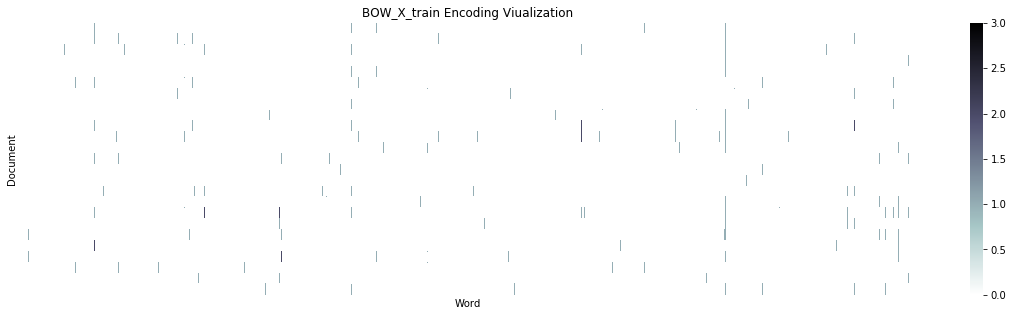

In [87]:
sns.heatmap(BOW_X_train.toarray()[:25, :2818], 
            cmap=plt.cm.bone_r,
            # linewidths=0.0001, 
            linecolor='gray', 
            cbar=True,
            xticklabels=False, yticklabels=False)

plt.xlabel("Word")
plt.ylabel("Document")
plt.title("BOW_X_train Encoding Viualization")
plt.gcf().set_size_inches(20,5)
plt.show()

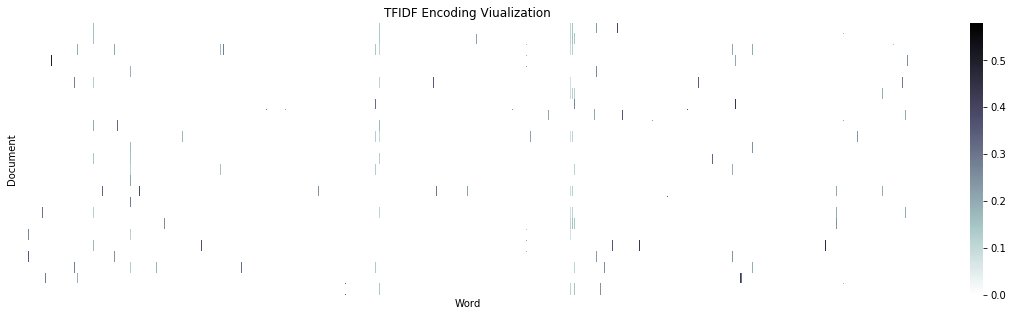

In [88]:
sns.heatmap(X_train_vectorized.toarray()[:25, :2856], 
            cmap=plt.cm.bone_r,
            # linewidths=0.0001, 
            linecolor='gray', 
            cbar=True,
            xticklabels=False, yticklabels=False)

plt.xlabel("Word")
plt.ylabel("Document")
plt.title("TFIDF Encoding Viualization")
plt.gcf().set_size_inches(20,5)
plt.show()

In [90]:
ingre_df.head(10) 

,ingredients,total
0,salt,18049
1,onions,7972
2,olive oil,7972
3,water,7457
4,garlic,7380
5,sugar,6434
6,garlic cloves,6237
7,butter,4848
8,ground black pepper,4785
9,all-purpose flour,4632


In [91]:
X_train_ingre = Counter(
    [i for sublist in X_train.ingredients \
     for i in sublist]).most_common()
print('학습데이터 ingredient 개수', len(X_train_ingre))
print('가장 많이 출현한 ingredient \n', X_train_ingre[:10])

학습데이터 ingredient 개수 6182
가장 많이 출현한 ingredient 
 [('salt', 13463), ('olive oil', 5988), ('onions', 5923), ('water', 5610), ('garlic', 5455), ('sugar', 4861), ('garlic cloves', 4717), ('butter', 3613), ('ground black pepper', 3544), ('all-purpose flour', 3478)]


In [92]:
X_train_ingre = Counter(
    [i for sublist in X_train.seperated_ingredients \
     for i in sublist]).most_common()
print('학습데이터 ingredient 개수', len(X_train_ingre))
print('가장 많이 출현한 ingredient \n', X_train_ingre[:10])

학습데이터 ingredient 개수 83
가장 많이 출현한 ingredient 
 [('e', 450199), (',', 291010), (' ', 284054), ('a', 282457), ('r', 280777), ('s', 259876), ('o', 251904), ('l', 223541), ('i', 219901), ('n', 190157)]


In [93]:
X_test_ingre = Counter(
    [i for sublist in X_test.ingredients \
     for i in sublist]).most_common()
print('실험데이터 ingredient 개수', len(X_test_ingre))
print('가장 많이 출현한 ingredient \n', X_test_ingre[:10])

실험데이터 ingredient 개수 4513
가장 많이 출현한 ingredient 
 [('salt', 4586), ('onions', 2049), ('olive oil', 1984), ('garlic', 1925), ('water', 1847), ('sugar', 1573), ('garlic cloves', 1520), ('ground black pepper', 1241), ('butter', 1235), ('all-purpose flour', 1154)]


In [94]:
len(set(dict(X_train_ingre).keys()) - set(dict(X_test_ingre).keys()))

83

In [95]:
len(set(dict(X_test_ingre).keys()) - set(dict(X_train_ingre).keys()))

4513

In [97]:
'Boursin' in dict(X_train_ingre).keys()

False

In [98]:
'Boursin' in dict(X_test_ingre).keys()

True

In [99]:
'Boursin' in vect.get_feature_names()

False

In [100]:
X_train_vectorized

<29830x2856 sparse matrix of type '<class 'numpy.float64'>'
	with 570196 stored elements in Compressed Sparse Row format>

In [101]:
X_test_transformed

<9944x2856 sparse matrix of type '<class 'numpy.float64'>'
	with 191585 stored elements in Compressed Sparse Row format>

### 모델링

In [105]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression(C=10, multi_class='ovr', penalty='l2', verbose=1)
clf1.fit(X_train_vectorized, y_train)
clf1.score(X_test_transformed, y_test)

c:\users\daumsoft\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[LibLinear]

0.794147224456959

In [106]:
pd.DataFrame.from_dict(clf1.get_params(), orient='index', columns=['param_value']).rename_axis('param_name').reset_index()

,param_name,param_value
0,C,10
1,class_weight,None
2,dual,False
3,fit_intercept,True
4,intercept_scaling,1
5,l1_ratio,None
6,max_iter,100
7,multi_class,ovr
8,n_jobs,None
9,penalty,l2


In [108]:
clf1.predict(X_test_transformed)[:10]

array([13, 13,  7, 16, 11, 13,  9,  3, 13,  0])

In [109]:
clf1.score(X_train_vectorized, y_train)

0.8628226617499162

In [110]:
clf1.score(X_test_transformed, y_test)

0.794147224456959

In [111]:
np.round(clf1.predict_proba(X_test_transformed),2)[0]

array([0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [112]:
clf1_predict_proba = np.round(clf1.predict_proba(X_test_transformed),2)

predict_prob_df = pd.DataFrame(clf1_predict_proba, columns=[[x.__add__(1) for x in list(range(20))]])
predict_prob_df[:10]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.99,0.0,0.00,0.00,0.00,0.00,0.00
1,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.96,0.0,0.00,0.01,0.00,0.00,0.01
2,0.01,0.01,0.01,0.01,0.01,0.01,0.13,0.64,0.00,0.11,0.00,0.01,0.01,0.01,0.0,0.02,0.01,0.01,0.00,0.00
3,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.02,0.00,0.00,0.00,0.0,0.00,0.88,0.02,0.00,0.00
4,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.97,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.99,0.0,0.00,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.00,0.00,0.18,0.01,0.00,0.00,0.76,0.00,0.00,0.00,0.01,0.0,0.00,0.03,0.01,0.00,0.00
7,0.00,0.00,0.00,0.97,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.0,0.00,0.00,0.00,0.00,0.00
8,0.01,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.12,0.00,0.02,0.00,0.80,0.0,0.00,0.00,0.01,0.00,0.00
9,0.88,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.02,0.00,0.02,0.00,0.01,0.0,0.00,0.00,0.01,0.02,0.01


In [113]:
predict_prob_df[:10].style.background_gradient(cmap='PuBu', axis=1 ,text_color_threshold=0.5, high=0.1) # , high=0.1

In [ ]:
# np.get_printoptions()  # default numpy print options

In [116]:
lb.inverse_transform(y_test)[:10]

array(['mexican', 'mexican', 'indian', 'southern_us', 'japanese',
       'mexican', 'italian', 'chinese', 'mexican', 'brazilian'],
      dtype=object)

In [117]:
y_test_real = lb.inverse_transform(y_test)
y_pred_real = lb.inverse_transform(clf1.predict(X_test_transformed))

In [ ]:
from sklearn.metrics import confusion_matrix
# np.set_printoptions(linewidth=np.inf)
confusion_matrix(y_test_real, y_pred_real, list(set(y_test_real)))

In [ ]:
cm = confusion_matrix(y_test_real, y_pred_real, list(set(y_test_real)))

np.round(cm.astype('float') / cm.sum(axis=1)[:, np.newaxis],2)

In [120]:
lb.inverse_transform(np.unique(y_test))

array(['brazilian', 'british', 'cajun_creole', 'chinese', 'filipino',
       'french', 'greek', 'indian', 'irish', 'italian', 'jamaican',
       'japanese', 'korean', 'mexican', 'moroccan', 'russian',
       'southern_us', 'spanish', 'thai', 'vietnamese'], dtype=object)

In [121]:
(Counter(y_test))

Counter({0: 120,
         1: 198,
         2: 362,
         3: 696,
         4: 181,
         5: 658,
         6: 302,
         7: 783,
         8: 159,
         9: 1932,
         10: 147,
         11: 348,
         12: 183,
         13: 1631,
         14: 199,
         15: 118,
         16: 1076,
         17: 252,
         18: 395,
         19: 204})

In [122]:
print(metrics.classification_report(
    y_true=y_test,
    y_pred=clf1.predict(X_test_transformed),
    ))

              precision    recall  f1-score   support

           0       0.79      0.56      0.65       120
           1       0.59      0.46      0.52       198
           2       0.76      0.72      0.74       362
           3       0.82      0.86      0.84       696
           4       0.75      0.59      0.66       181
           5       0.62      0.66      0.64       658
           6       0.82      0.68      0.74       302
           7       0.87      0.91      0.89       783
           8       0.66      0.48      0.56       159
           9       0.81      0.89      0.85      1932
          10       0.85      0.74      0.79       147
          11       0.81      0.72      0.76       348
          12       0.80      0.77      0.78       183
          13       0.91      0.92      0.92      1631
          14       0.82      0.79      0.81       199
          15       0.60      0.46      0.52       118
          16       0.72      0.80      0.76      1076
          17       0.68    

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(y_test, clf1.predict(X_test_transformed), classes=np.unique(lb.inverse_transform(y_test)),
                      normalize=True, title='Normalized confusion matrix')

In [ ]:
plot_confusion_matrix(y_test, clf1.predict(X_test_transformed), classes=np.unique(lb.inverse_transform(y_test))
                      , title='without Normalized confusion matrix')

In [125]:
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    plt.gcf().set_size_inches(15,10)

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
